In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
data = pd.read_csv("./cleaned/usdrub.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
price = data.close

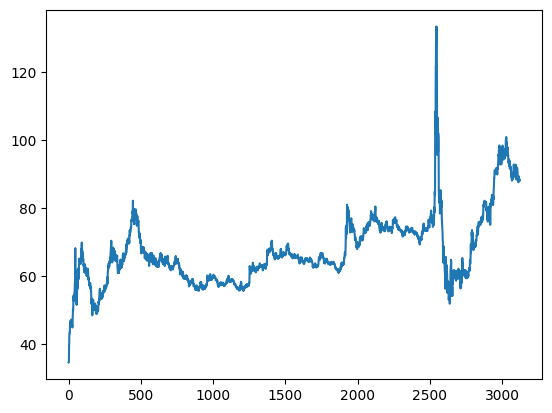

In [5]:
plt.plot(price)

In [6]:
sample = price[0:100]

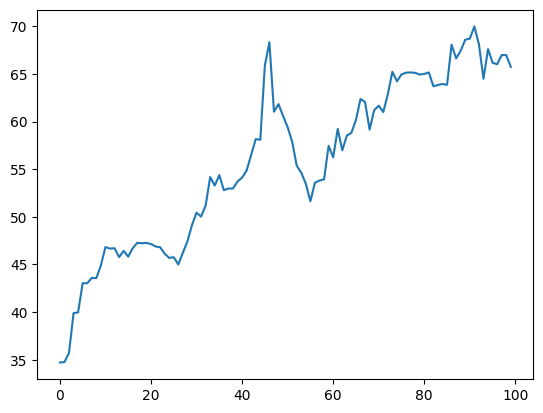

In [7]:
plt.plot(sample)

In [82]:
# Kalman filter
l = len(sample)
x_pred = np.zeros(l)
x = np.zeros(l)
p_pred = np.zeros(l)
p = np.zeros(l)
k = np.zeros(l)

z = sample

In [83]:
# Initialization
x[0] = z[0]
p[0] = 10000
k[0] = 1
r = 100
q = 10

# First prediction
x_pred[0] = x[0]
p_pred[0] = p[0] + q

In [84]:
# Iterate
for i in range(1, l):
  # Measurement 
  # Kalman Gain
  k[i] = p_pred[i-1] / (p_pred[i-1] + r)

  # State update
  x[i] = x_pred[i-1] + k [i] * (z[i] - x_pred[i-1])

  # Covariance update
  p[i] = (1 - k[i]) * p_pred[i-1]


  x_pred[i] = x[i] # state extrapolation
  p_pred[i] = p[i] + q # covariance extrapolation
  

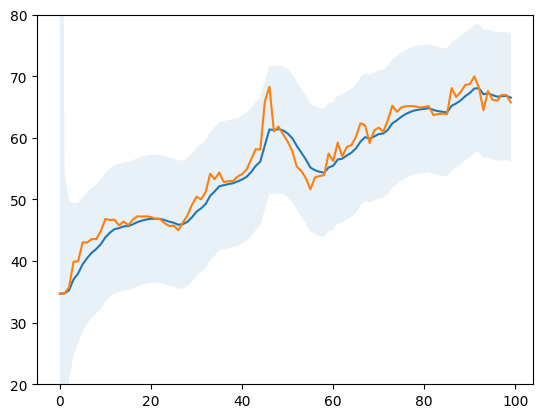

In [91]:
sig = p**(0.5)
plt.plot(x)
plt.plot(z)
plt.ylim(20, 80)
plt.fill_between(range(0, l), x - 2*sig, x + 2*sig, alpha=0.1)

(20.0, 80.0)

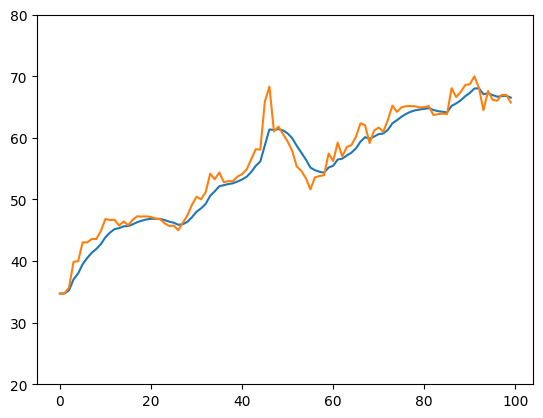

In [89]:
fig, ax = plt.subplots()
ax.plot(x)
ax.plot(z)
ax.set_ylim(20, 80)

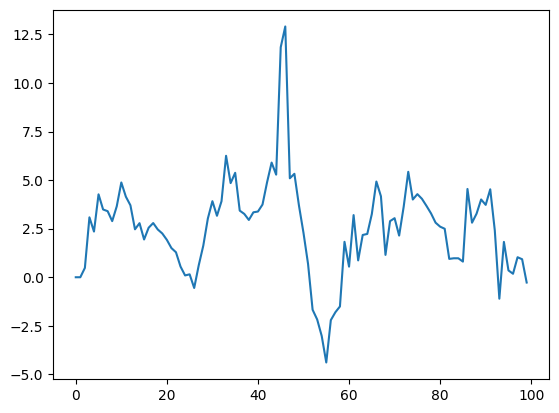

In [76]:
plt.plot(z - x)

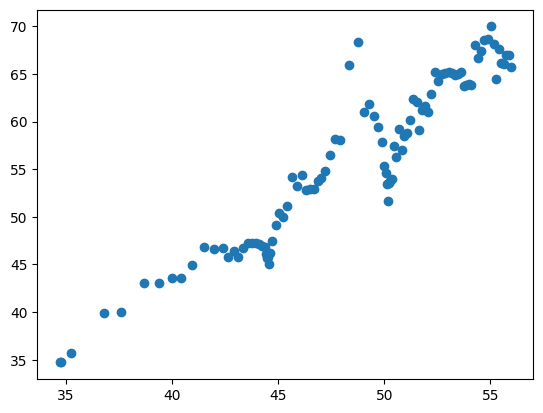

In [60]:
plt.scatter(x, z)